In [14]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy as hc
from sklearn.linear_model import LinearRegression
import missingno as msno 
import streamlit as st 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100
from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.linear_model import Lasso


In [15]:
df = pd.read_csv("df.csv")

In [16]:
tabcorr = df.corr() 

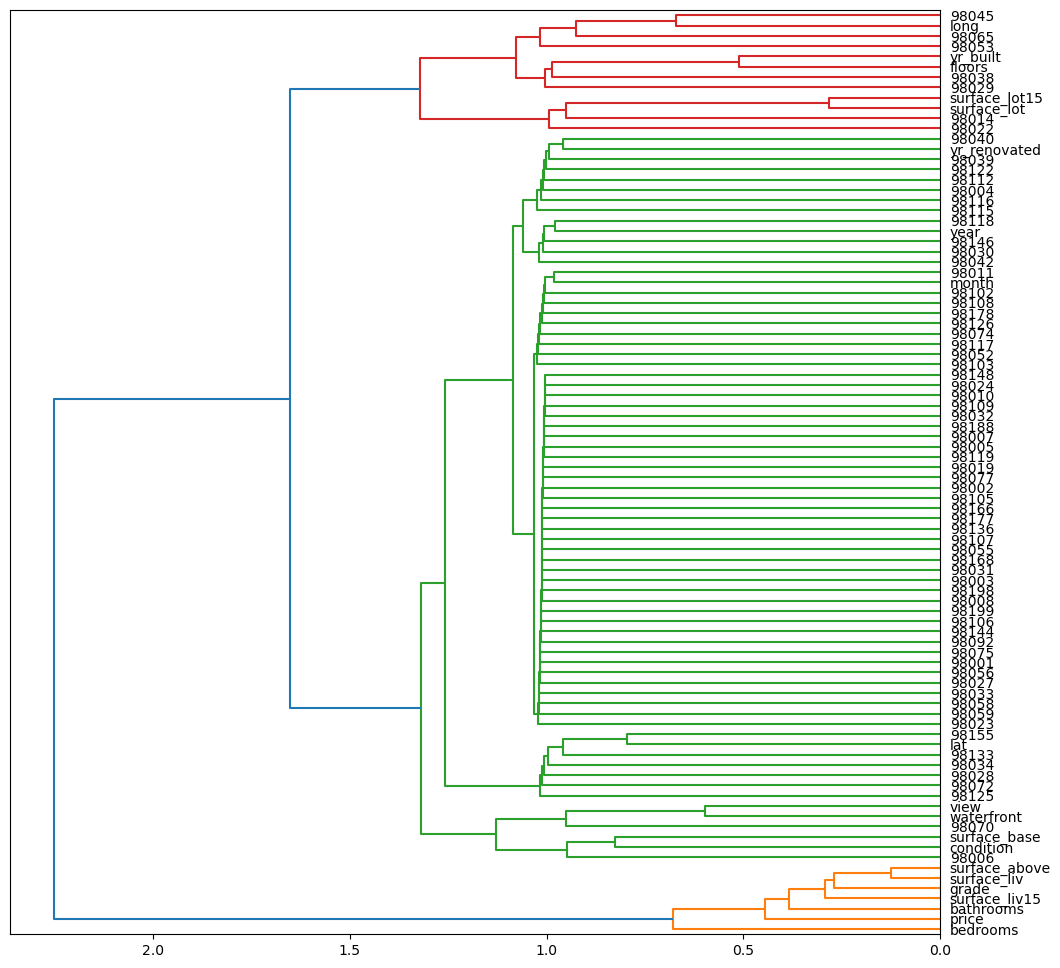

In [17]:
corr = 1 - df.corr()
corr_condensed = hc.distance.squareform(corr)
link = hc.linkage(corr_condensed, method='ward')
plt.figure(figsize=(12,12))
den = hc.dendrogram(link, labels=df.columns, orientation='left', leaf_font_size=10)

In [18]:
correlations = tabcorr.price
print(correlations)

price            1.000000
bedrooms         0.315867
bathrooms        0.525844
floors           0.256782
waterfront       0.266443
view             0.397307
condition        0.035959
grade            0.667909
yr_built         0.053871
yr_renovated     0.126395
lat              0.306817
long             0.022031
year             0.003769
month           -0.009950
surface_liv      0.701894
98001           -0.092010
98002           -0.080378
98003           -0.076846
98004            0.271192
98005            0.065101
98006            0.133683
98007            0.016971
98008            0.033038
98010           -0.021661
98011           -0.012976
98014           -0.017520
98019           -0.029632
98022           -0.063585
98023           -0.106209
98024            0.007600
98027            0.029151
98028           -0.024413
98029            0.024225
98030           -0.072818
98031           -0.073947
98032           -0.060058
98033            0.102535
98034           -0.008153
98038       

In [19]:
correlations = correlations.drop(['price'],axis=0)

In [20]:
print(abs(correlations).sort_values(ascending=False))

surface_liv      0.701894
grade            0.667909
surface_above    0.605368
surface_liv15    0.585238
bathrooms        0.525844
view             0.397307
surface_base     0.323779
bedrooms         0.315867
lat              0.306817
98004            0.271192
waterfront       0.266443
floors           0.256782
98039            0.212626
98040            0.204908
98112            0.169864
98006            0.133683
yr_renovated     0.126395
98023            0.106209
98033            0.102535
98042            0.100416
98001            0.092010
98168            0.091755
98105            0.090966
surface_lot      0.089856
98075            0.088656
98199            0.083640
surface_lot15    0.082807
98002            0.080378
98038            0.078988
98119            0.078076
98003            0.076846
98106            0.075455
98058            0.074588
98198            0.074109
98031            0.073947
98030            0.072818
98055            0.072060
98092            0.071767
98178       

In [21]:
continuous_features = ['sqft_living','sqrt_log','sqft_above','sqft_basement','sqft_living15','sqrt_lot15','lat','long']
discrete_features = ['month','year','bedrooms','bathrooms','floors','waterfront','view','condition',
                     'grade','yr_built','yr_renovated']

In [22]:
df1 = df[df.price<1000000].drop(discrete_features, axis=1)

In [23]:
X = df1.drop(['price'], axis=1)
y = df1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [24]:
lr = Lasso()
lr.fit(X_train, y_train)          
y_predi = lr.predict(X_test)  

/home/jadamin/miniconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.268e+13, tolerance: 6.890e+10
  model = cd_fast.enet_coordinate_descent(


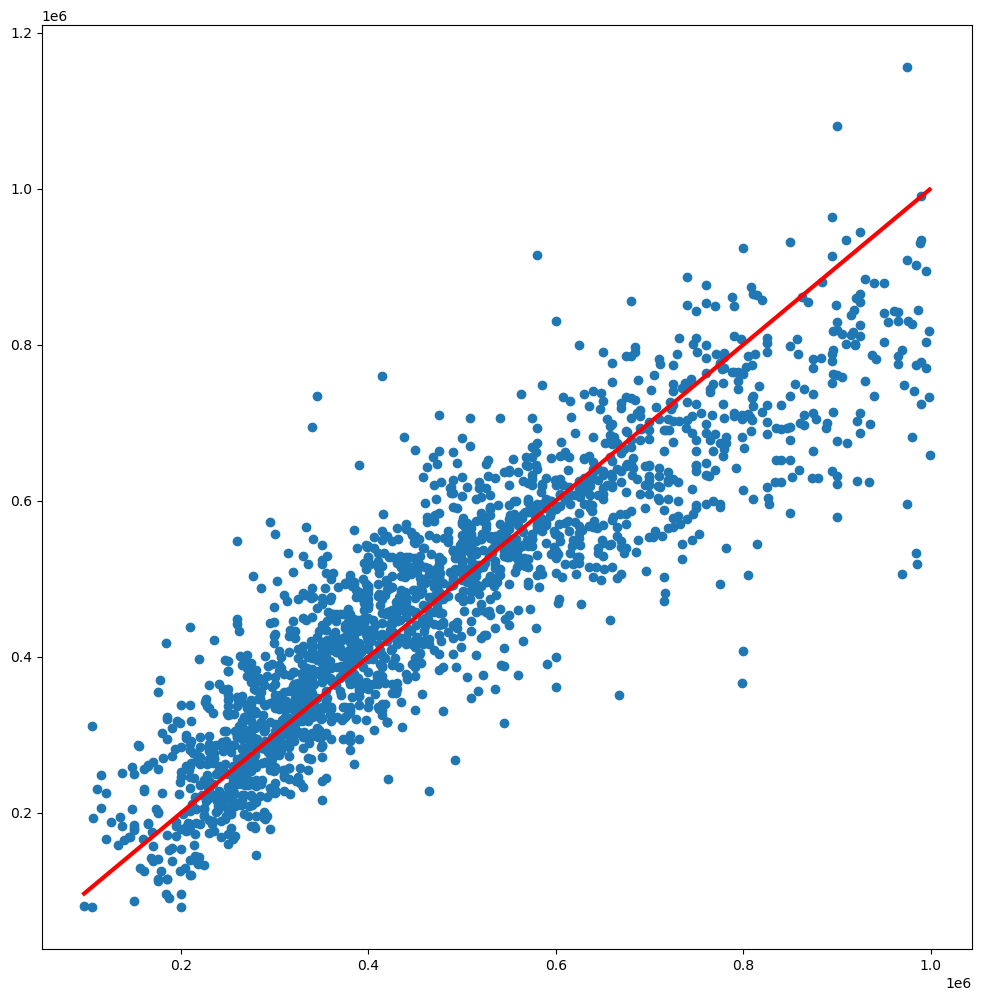

In [25]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_predi)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)

In [26]:
lr.score(X_test,y_test)

0.7971267027983335